**UNZIP Dataset:**

In [1]:
from zipfile import ZipFile as unzipper
unzipped = unzipper('/content/6310f5022d614_hackathon.zip')
unzipped.extractall()

**IMPORTS:**

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics

from sklearn_pandas import CategoricalImputer
from tqdm import tqdm

from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score
from sklearn.metrics import mean_squared_error, accuracy_score

! pip install catboost
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


**LOAD DATA:**

In [315]:
traindf=pd.read_csv('/content/hackathon/data/train.csv')
testdf=pd.read_csv('/content/hackathon/data/test.csv')
traindf

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,ff8081815733a243015733b2876600a6,BHK2,"Cauvery Colony,Koramangala",21-04-2018 14:44,12.934471,77.634471,FAMILY,1,1,1,...,2,E,2,6,12,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2,40000
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,09-10-2017 12:48,12.929557,77.672280,ANYONE,0,1,0,...,2,NE,2,3,4,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2,22000
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,12-06-2018 22:02,12.982870,80.262012,FAMILY,0,1,0,...,3,E,3,1,5,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3,28000
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,...,1,E,1,1,2,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0,8000
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,...,3,E,4,0,0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1,45000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20495,ff8081815b48bfdd015b4d0e6e720dde,BHK3,"Gattigere,RR Nagar",13-12-2017 18:08,12.925380,77.524397,ANYONE,1,1,1,...,3,E,3,4,4,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",BOREWELL,AP,2,25000
20496,ff8081815e73c2e2015e74ac10e91975,BHK2,Koramangala 4th Block,19-10-2017 20:31,12.931072,77.632361,ANYONE,0,0,0,...,2,N,2,1,2,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IH,2,30000
20497,ff8081816073f28c016077bb8db47e4f,BHK2,Kumaraswamy Layout,21-12-2017 21:18,12.901800,77.566597,FAMILY,1,1,0,...,2,W,2,5,5,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",BOREWELL,AP,2,16000
20498,ff8081814c6f8c9b014c6febae49016f,BHK2,Indiranagar,28-06-2018 21:58,12.965502,77.647694,FAMILY,0,1,0,...,2,E,2,2,4,"{""LIFT"":true,""GYM"":false,""INTERNET"":true,""AC"":...",CORP_BORE,AP,3,30000


In [ ]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20500 entries, 0 to 20499
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               20500 non-null  object 
 1   type             20500 non-null  object 
 2   locality         20500 non-null  object 
 3   activation_date  20500 non-null  object 
 4   latitude         20500 non-null  float64
 5   longitude        20500 non-null  float64
 6   lease_type       20500 non-null  object 
 7   gym              20500 non-null  int64  
 8   lift             20500 non-null  int64  
 9   swimming_pool    20500 non-null  int64  
 10  negotiable       20500 non-null  int64  
 11  furnishing       20500 non-null  object 
 12  parking          20500 non-null  object 
 13  property_size    20500 non-null  int64  
 14  property_age     20500 non-null  int64  
 15  bathroom         20500 non-null  int64  
 16  facing           20500 non-null  object 
 17  cup_board   

In [ ]:
traindf.describe()

,latitude,longitude,gym,lift,swimming_pool,negotiable,property_size,property_age,bathroom,cup_board,floor,total_floor,balconies,rent
count,20500.000000,20500.000000,20500.000000,20500.000000,20500.000000,20500.000000,20500.000000,20500.000000,20500.000000,20500.000000,20500.000000,20500.000000,20500.000000,20500.000000
mean,12.945751,77.637280,0.226732,0.361463,0.174927,0.711512,1061.829463,5.770634,1.858146,4.553512,1.873561,3.801610,1.148976,19053.602195
std,0.029594,0.110586,0.418728,0.480436,0.379914,0.453070,591.419631,6.350271,0.710822,335.416267,2.184927,3.185748,0.993835,8433.949300
min,12.900004,77.500072,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,8000.000000
25%,12.918188,77.571956,0.000000,0.000000,0.000000,0.000000,700.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,12500.000000
50%,12.943800,77.633491,0.000000,0.000000,0.000000,1.000000,1047.000000,5.000000,2.000000,2.000000,1.000000,3.000000,1.000000,17500.000000
75%,12.970952,77.695760,0.000000,1.000000,0.000000,1.000000,1281.000000,10.000000,2.000000,3.000000,2.000000,4.000000,2.000000,24000.000000
max,12.999999,80.266346,1.000000,1.000000,1.000000,1.000000,50000.000000,400.000000,21.000000,48026.000000,25.000000,26.000000,13.000000,50000.000000


In [ ]:
traindf.duplicated(subset=['id']).describe()

count     20500
unique        1
top       False
freq      20500
dtype: object

In [ ]:
traindf.describe(include="O")

,id,type,locality,activation_date,lease_type,furnishing,parking,facing,amenities,water_supply,building_type
count,20500,20500,20500,20500,20500,20500,20500,20500,20500,20500,20500
unique,20500,6,1938,19566,4,3,4,8,4994,3,4
top,ff8081815733a243015733b2876600a6,BHK2,Whitefield,04-11-2017 18:11,FAMILY,SEMI_FURNISHED,BOTH,E,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORP_BORE,IF
freq,1,11679,908,4,10174,17895,10799,9514,2157,10693,9238


In [ ]:
traindf.select_dtypes(include="object").shape

(20500, 11)

**SPLITTING AMENITIES:**

In [4]:
traindf['amenities'][0].split(',')

['{"LIFT":true',
 '"GYM":true',
 '"INTERNET":true',
 '"AC":false',
 '"CLUB":true',
 '"INTERCOM":true',
 '"POOL":true',
 '"CPA":true',
 '"FS":true',
 '"SERVANT":false',
 '"SECURITY":true',
 '"SC":true',
 '"GP":true',
 '"PARK":false',
 '"RWH":true',
 '"STP":true',
 '"HK":false',
 '"PB":true',
 '"VP":true}']

In [5]:
def amenitiesSplit(df):
  amenities=df['amenities'].str.split(',', expand=True)

  title=[]
  val=[]
  for col in list(amenities):

    title.append(amenities[col][0].split(':',1)[0])
    val.append(amenities[col].str.split(':', expand=True)[1])

    val[col]=val[col]

    titlestripped=title[col].strip('\"')

    df[titlestripped]=val[col] 

  df.rename(columns={'{"LIFT':'LIFT'})

  df['VP']=df['VP'].str.strip('\}')

  return df.drop(['gym','lift','swimming_pool'],axis=1)  

In [6]:
traindf=amenitiesSplit(traindf)

In [8]:
testdf=amenitiesSplit(testdf)

**REMOVING RENT:**

In [316]:
Rent=traindf['rent']
traindf.drop(['rent'], axis=1, inplace=True)

**Combining Test and Train DF:**

In [10]:
cdf=pd.concat([traindf.assign(ind="train"), testdf.assign(ind="test")])
cdf.reset_index(inplace=True)
cdf.drop(['index'], axis=1, inplace=True)
cdf

,id,type,locality,activation_date,latitude,longitude,lease_type,negotiable,furnishing,parking,...,SECURITY,SC,GP,PARK,RWH,STP,HK,PB,VP,ind
0,ff8081815733a243015733b2876600a6,BHK2,"Cauvery Colony,Koramangala",21-04-2018 14:44,12.934471,77.634471,FAMILY,0,SEMI_FURNISHED,BOTH,...,true,true,true,false,true,true,false,true,true,train
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,09-10-2017 12:48,12.929557,77.672280,ANYONE,1,SEMI_FURNISHED,BOTH,...,true,true,false,true,true,true,false,true,true,train
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,12-06-2018 22:02,12.982870,80.262012,FAMILY,0,SEMI_FURNISHED,BOTH,...,false,true,false,true,false,false,false,true,true,train
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,1,SEMI_FURNISHED,TWO_WHEELER,...,false,false,false,false,false,false,false,false,false,train
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,1,SEMI_FURNISHED,BOTH,...,false,false,false,true,false,false,false,false,true,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,ff8081815216f51101521aa9d46c191f,BHK2,Hanumanthnagar,10-06-2018 18:22,12.941654,77.559999,FAMILY,1,SEMI_FURNISHED,BOTH,...,true,true,false,false,false,false,false,false,false,test
24996,ff8081816098166901609bf52bb702a8,BHK2,Lakkasandra,21-01-2018 14:36,12.942973,77.597738,ANYONE,1,SEMI_FURNISHED,TWO_WHEELER,...,false,false,false,false,false,false,false,false,false,test
24997,ff808181629ac9860162a7ac1a4253bb,BHK1,"Jeevan Samskruthi Apartment, Shiridi Sai Templ...",30-05-2018 16:10,12.949315,77.713807,ANYONE,1,SEMI_FURNISHED,NONE,...,false,false},None,None,None,None,None,None,None,test
24998,ff8081815b57c717015b580af22f1bbd,BHK3,Mullur,11-07-2018 16:17,12.914104,77.716428,FAMILY,1,SEMI_FURNISHED,BOTH,...,true,true},None,None,None,None,None,None,None,test


In [11]:
cdf.isnull().sum()

id                    0
type                  0
locality              0
activation_date       0
latitude              0
longitude             0
lease_type            0
negotiable            0
furnishing            0
parking               0
property_size         0
property_age          0
bathroom              0
facing                0
cup_board             0
floor                 0
total_floor           0
amenities             0
water_supply          0
building_type         0
balconies             0
{"LIFT                0
GYM                   0
INTERNET              0
AC                    0
CLUB                  0
INTERCOM              0
POOL                  0
CPA                   0
FS                    0
SERVANT               0
SECURITY              0
SC                    0
GP                 1283
PARK               1283
RWH                1283
STP                1283
HK                 1283
PB                 1283
VP                 1365
ind                   0
dtype: int64

In [ ]:
#There are null values and we will deal with it later

**FINDING PROPER ADDRESS:**

**Geopy for latitude and longitude**

In [ ]:
!pip install geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
location=[]

In [34]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="mlhackathon")

In [ ]:
cdf['Coordinates']=cdf['latitude'].astype(str) + ", " + cdf['longitude'].astype(str)
#cdf.drop(['latitude','longitude'], axis=1, inplace=True)

Comparison:

In [ ]:
cdf[['Coordinates','locality']]

,Coordinates,locality
0,"12.9344709, 77.634471","Cauvery Colony,Koramangala"
1,"12.92955671, 77.6722797",Bellandur
2,"12.98287026, 80.26201214",Thiruvanmiyur
3,"12.95599061, 77.53163369",Attiguppe
4,"12.96390329, 77.64944586",Kodihalli
...,...,...
24995,"12.94165365, 77.55999943",Hanumanthnagar
24996,"12.94297279, 77.59773779",Lakkasandra
24997,"12.94931477, 77.713807","Jeevan Samskruthi Apartment, Shiridi Sai Templ..."
24998,"12.9141041, 77.7164282",Mullur


In [31]:
location=[]

In [ ]:
#This command was done locally and location list was saved

#for num in tqdm(range(list(cdf))):
for num in tqdm(range(11355,25000)):

  location.append(geolocator.reverse(cdf['Coordinates'][num]).address)
  


100%|██████████| 13645/13645 [1:53:43<00:00,  2.00it/s]


In [28]:
locationP1=pd.read_csv('/content/location11355updated.csv')
locationP2=pd.read_csv('/content/location25000.csv')

locationP1.drop(locationP1.index[11355:],inplace=True)

print(locationP1.shape, locationP2.shape)

(11355, 2) (13645, 2)


In [29]:
locationDF=pd.concat([locationP1, locationP2])

locationDF.drop(['Unnamed: 0'], axis=1, inplace=True)
locationDF.reset_index(inplace=True,drop=True)

**Complete Address:**

In [164]:
locationDF

,0
0,"ST Bed Layout, Agaram, East Zone, Bengaluru, B..."
1,"Abhee Prince Apartments, Bellanduru, Mahadevap..."
2,"Singapore Shoppe, 1st Seaward Road, CMWSSB Div..."
3,"Government High School and PU College, 14th D ..."
4,"15th Main Road, Kodihalli, Jeevanbhima Nagar, ..."
...,...
24995,"Shiva's Chats, Hanumantha Nagar Main Road / 50..."
24996,"Ganesha Temple, Temple Road;16th Cross Street,..."
24997,"Munekolala, Varthuru, Mahadevapura Zone, Benga..."
24998,"Aratt Adora, Gunjur Varthur Main Road, Varthur..."


**Parsing Address to get Pincode, State, City, Zone:**

In [166]:
Pincode=[]
State=[]
City=[]
Zone=[]

for i in range(len(locationDF)): 

  fulladdspl=locationDF['0'][i].split(', ')

  Pincode.append(fulladdspl[-2])
  State.append(fulladdspl[-3])
  City.append(fulladdspl[-4].split(" ")[0])
  Zone.append(fulladdspl[-5])


In [167]:
cdf['State']=State
cdf['City']=City
cdf['Zone']=Zone

Manual Cleaning:

In [168]:
cdf['State'].replace('Bangalore Urban','Karnataka',inplace=True)
cdf['State'].replace('Bangalore Rural','Karnataka',inplace=True)
cdf['State'].replace('Kolar district','Karnataka',inplace=True)

In [172]:
cdf['City'].replace('Sholinganallur','Chennai',inplace=True)
cdf['City'].replace('Hosakote','Bangalore',inplace=True)
cdf['City'].replace('Maluru','Bangalore',inplace=True)
cdf['City'].replace('Kanchipuram','Chennai',inplace=True)
cdf['City'].replace('Chengalpattu','Chennai',inplace=True)
cdf['City'].replace('Alandur','Chennai',inplace=True)
cdf['City'].replace('Kolar','Bangalore',inplace=True)
cdf['City'].replace('Anekal','Bangalore',inplace=True)

In [177]:
cdf['Zone'].replace('Bangalore South','Bangalore_South',inplace=True)
cdf['Zone'].replace('Bangalore East','Bangalore_East',inplace=True)
cdf['Zone'].replace('Bangalore North','Bangalore_North',inplace=True)
cdf['Zone'].replace('Anekal','Bangalore_South',inplace=True)
cdf['Zone'].replace('Hosakote taluk','Bangalore_South',inplace=True)
cdf['Zone'].replace('Bengaluru','BangaloreDROP',inplace=True)
cdf['Zone'].replace('Medavakkam','Chennai_1',inplace=True)
cdf['Zone'].replace('Baguru','Bangalore_North',inplace=True)
cdf['Zone'].replace('Zone 14 Perungudi','Chennai_2',inplace=True)
cdf['Zone'].replace('Yattakodi','Bangalore_7',inplace=True)
cdf['Zone'].replace('Zone 12 Alandur','Chennai_3',inplace=True)
cdf['Zone'].replace('Pallavaram','Chennai_4',inplace=True)
cdf['Zone'].replace('Baguru Sonnahalli','Bangalore_North',inplace=True)
cdf['Zone'].replace('Chennai','Chennai_5',inplace=True)
cdf['Zone'].replace('Tambaram','Chennai_6',inplace=True)
cdf['Zone'].replace('Maluru taluk','Bangalore_7',inplace=True)
cdf['Zone'].replace('Zone 15 Sholinganallur','Chennai_7',inplace=True)
cdf['Zone'].replace('Sholinganallur','Chennai_7',inplace=True)
cdf['Zone'].replace('Handenahalli','Bangalore_South',inplace=True)
cdf['Zone'].replace('Sriperumbudur','Chennai_8',inplace=True)
cdf['Zone'].replace('Kamanahalli','Bangalore_North',inplace=True)

**DATE:**

In [68]:
cdf['date'] = pd.to_datetime(cdf['activation_date'])

cdf['Year']=cdf['date'].dt.year
cdf['Month']=cdf['date'].dt.month
cdf['Day']=cdf['date'].dt.day

cdf[['Year','Month','Day']]

,Year,Month,Day
0,2018,4,21
1,2017,9,10
2,2018,12,6
3,2018,7,20
4,2018,5,31
...,...,...,...
24995,2018,10,6
24996,2018,1,21
24997,2018,5,30
24998,2018,11,7


In [180]:
cdf.to_csv('midcdf.csv')

**Categorical IMPUTER:**

for imputing Nan values in the amenities column

In [181]:
cdf.loc[:,'GP':'VP'].isnull().sum()

GP      1283
PARK    1283
RWH     1283
STP     1283
HK      1283
PB      1283
VP      1365
dtype: int64

In [254]:
fdf=cdf.copy()

for cols in list(cdf.loc[:,'GP':'VP']): 

  imputer = CategoricalImputer()
  data = np.array(cdf[cols], dtype=object)
  imputer.fit(data)
  fdf[cols]=imputer.transform(data)
  

**VISUALIZATIONS:**

**HeatMap:**

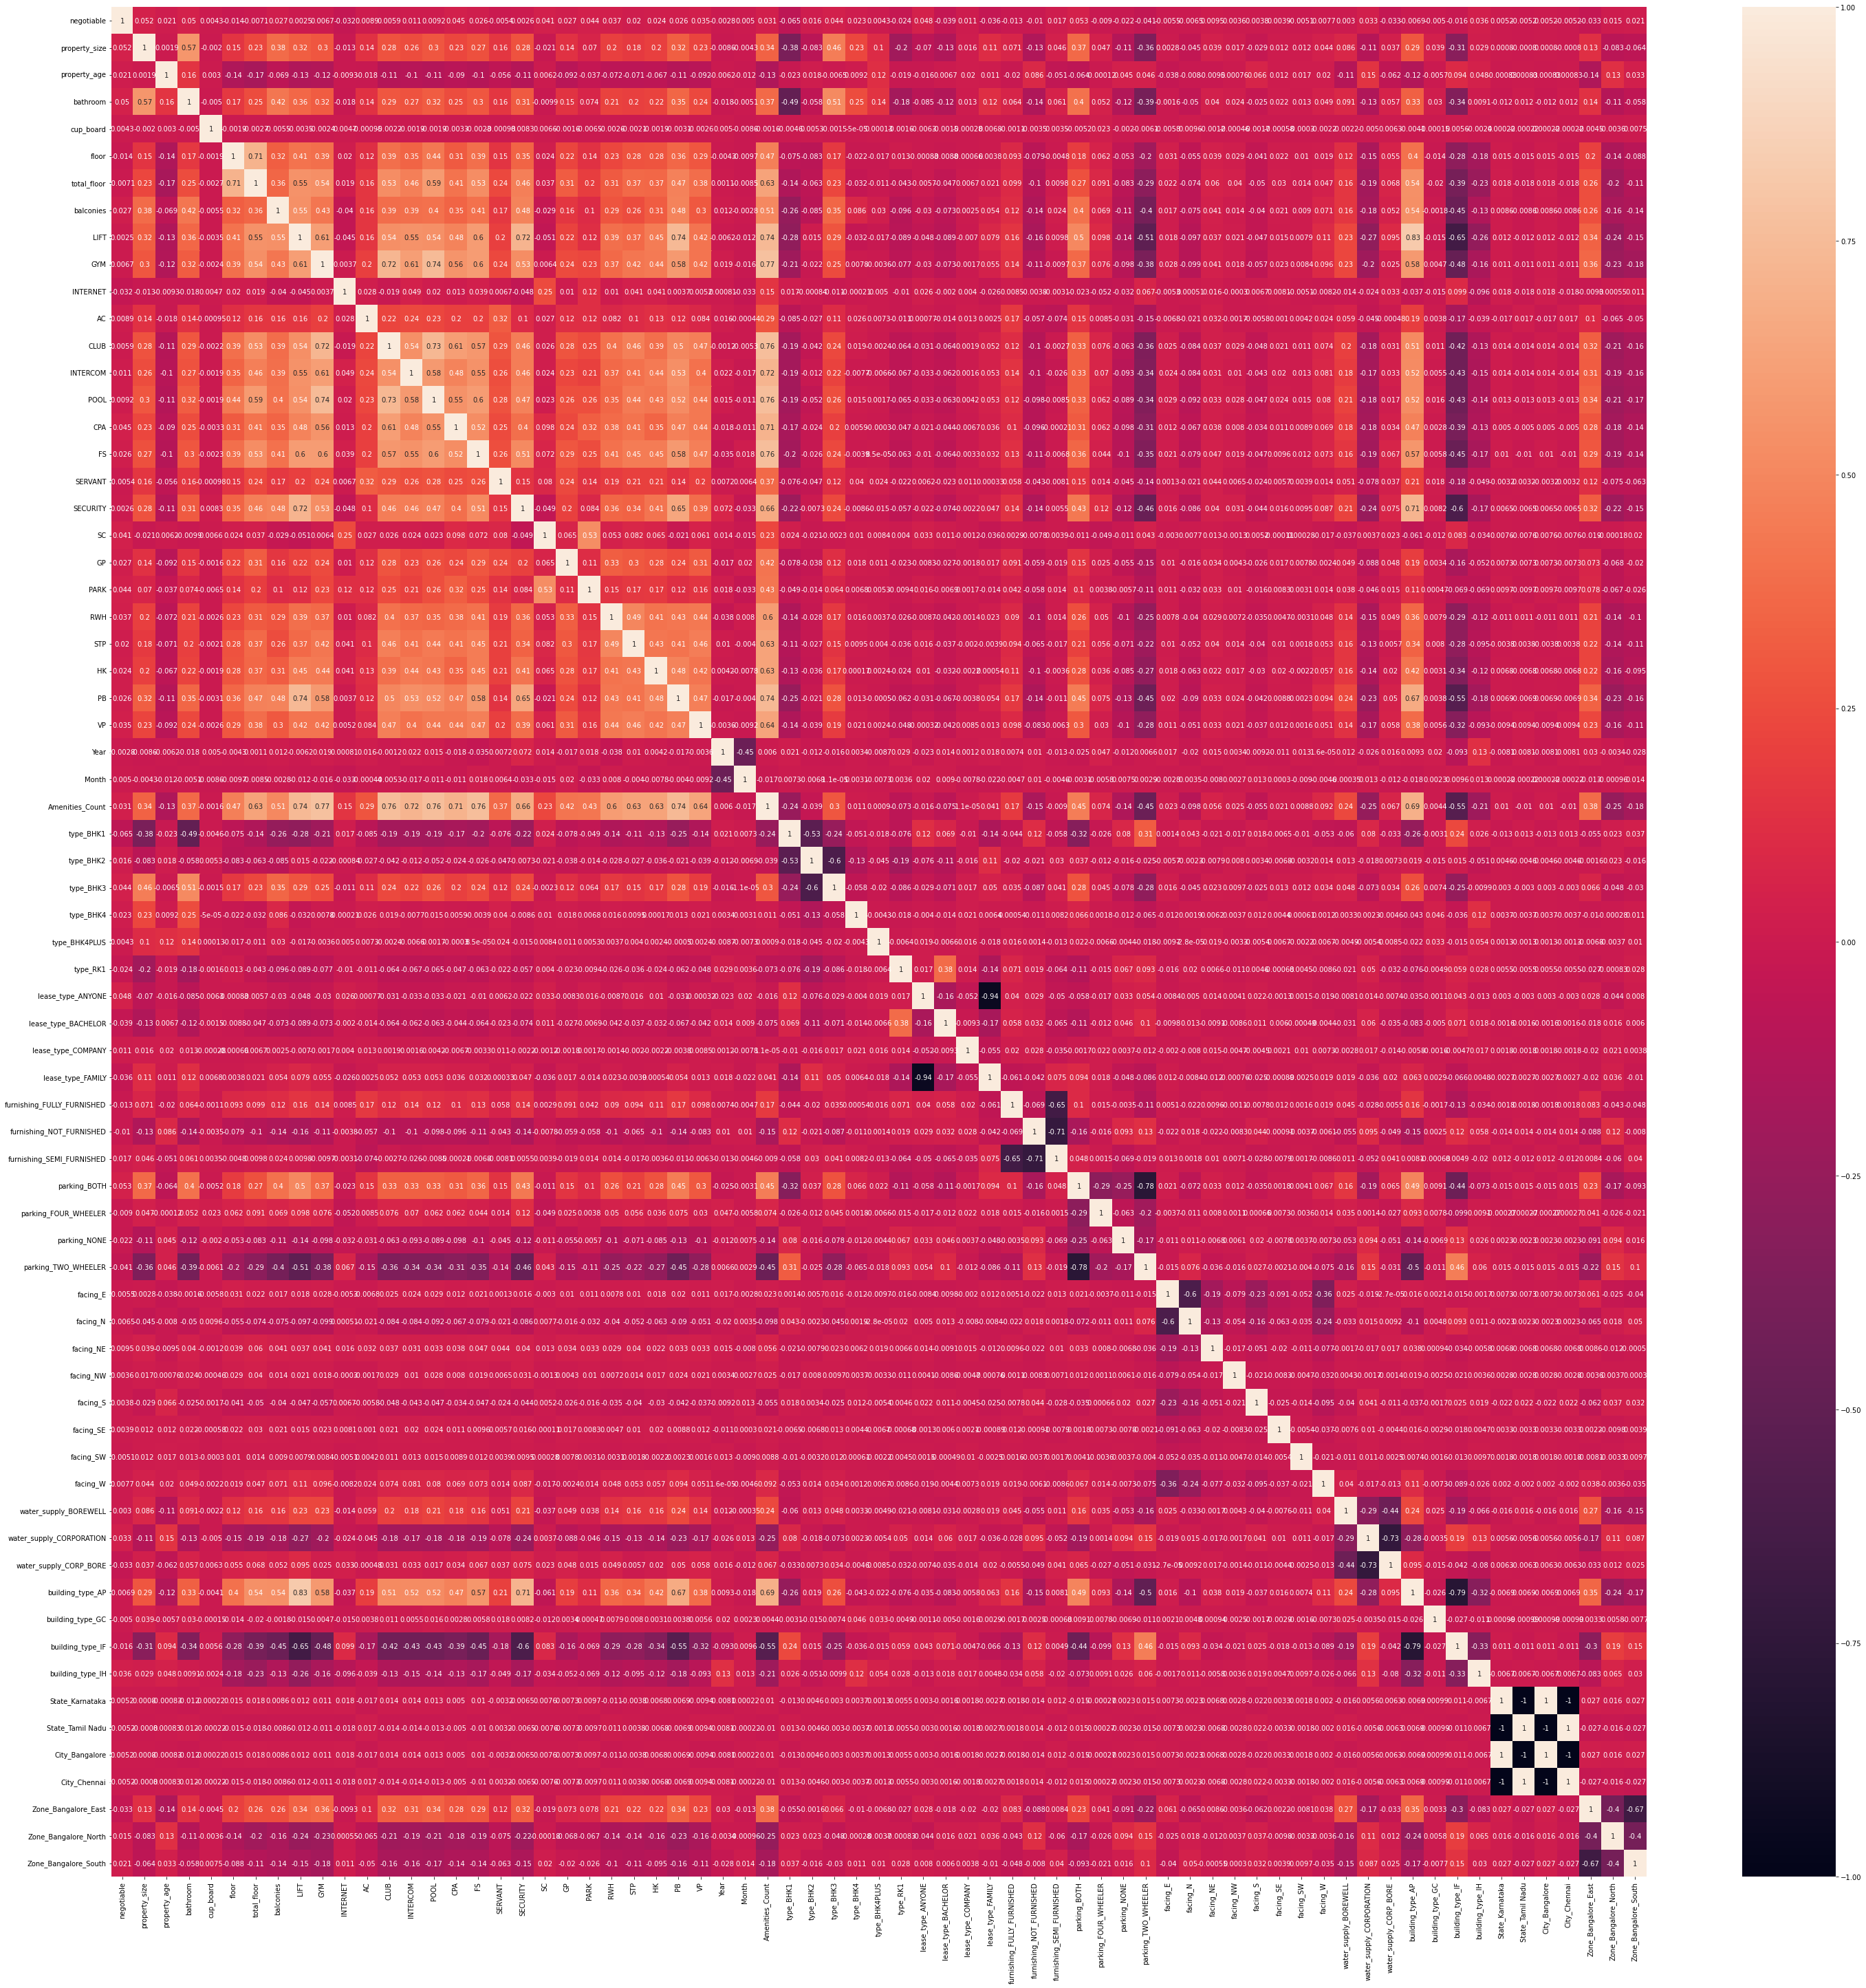

In [364]:
import seaborn as sns

dfcorr=fdf.corr()
plt.figure(figsize=(50,50))
sns.heatmap(dfcorr, annot=True)

In [ ]:
#Zoom to see values :)

**Distribution of Target:**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


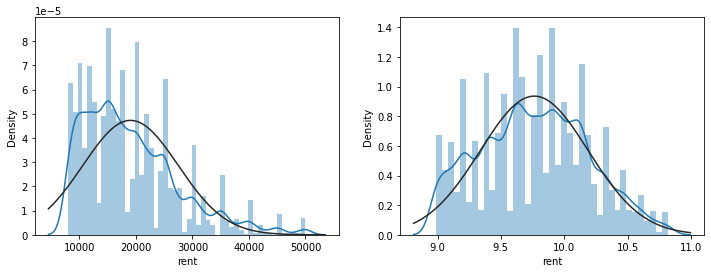

In [271]:
from scipy.stats import norm

fig, ax = plt.subplots(1,2)
width, height = fig.get_size_inches()
fig.set_size_inches(width*2, height)
sns.distplot(Rent, ax=ax[0], fit=norm)
sns.distplot(np.log(Rent+1), ax=ax[1], fit= norm)

**Lease Type Vals:**

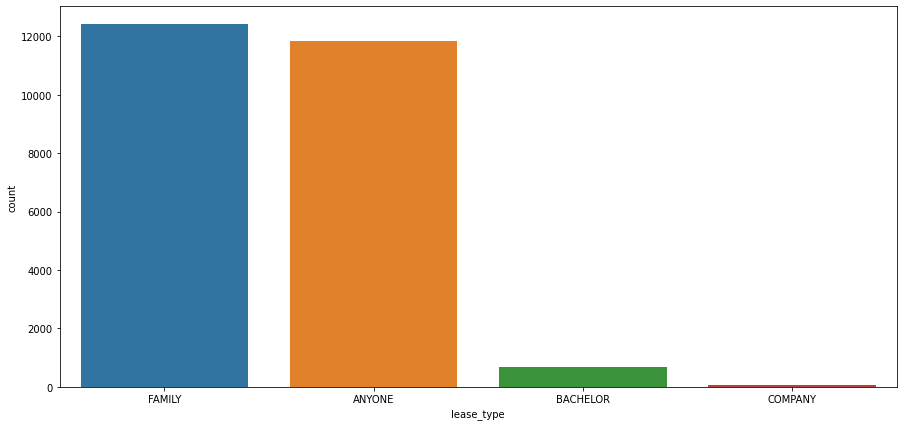

In [366]:
plt.figure(figsize=(15,7))
sns.countplot(x=cdf['lease_type'],order=cdf['lease_type'].value_counts().index)
plt.show()

**Age Vals:**

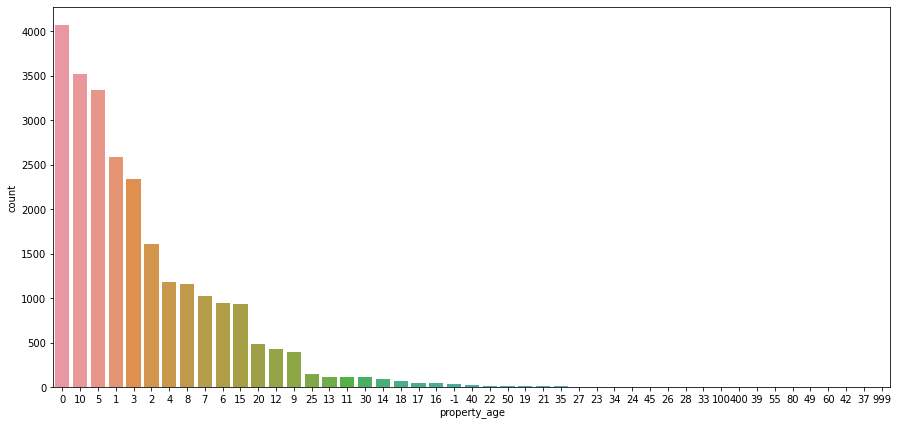

In [367]:
plt.figure(figsize=(15,7))
sns.countplot(x=cdf['property_age'],order=cdf['property_age'].value_counts().index)
plt.show()

In [370]:
traindf=pd.read_csv('/content/hackathon/data/train.csv')

**Age VS Rent:**

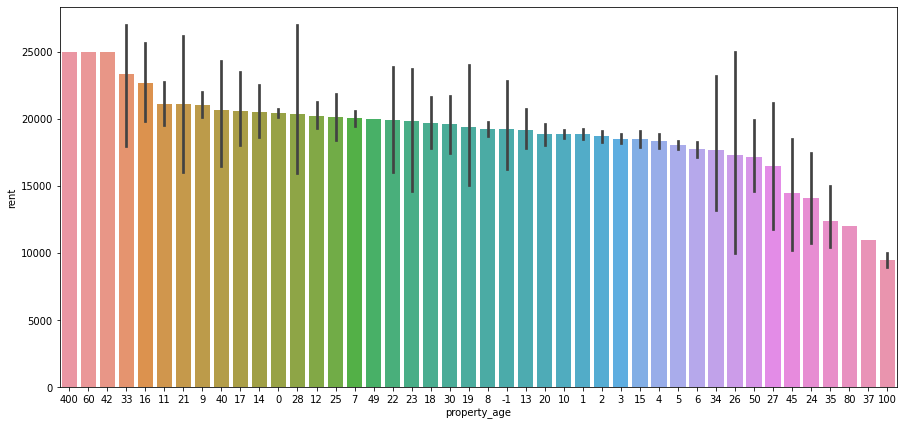

In [371]:
plt.figure(figsize=(15,7))
sns.barplot(x=traindf['property_age'],y=traindf['rent'],
            order=traindf.groupby(by='property_age').mean()['rent'].sort_values(ascending=False).index)
plt.show()

**Size VS Rent:**

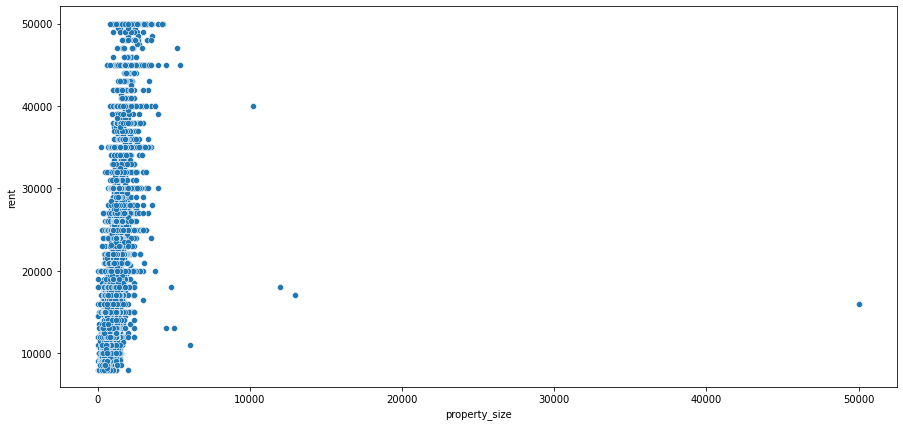

In [372]:
plt.figure(figsize=(15,7))
sns.scatterplot(x=cdf['property_size'],y=traindf['rent'])
plt.show()

**Log Transform:**

In [272]:
#Rent= np.log1p(Rent)

**ENCODING:**

**Cleaning 'SC' and 'lift' column:**

In [255]:
fdf['SC']=fdf['SC'].str.strip('\}')
fdf.rename(columns={'{"LIFT':'LIFT'}, inplace=True)

In [256]:
ind=fdf['ind']
fdf.drop(['id','locality','activation_date','latitude','longitude','amenities','ind','date'], axis=1, inplace=True)

**Converting str of sub amenities column to bool (int):**

In [257]:
for col in list(fdf.loc[:,'LIFT':'VP']):

  fdf[col]=fdf[col].str.lower().str.capitalize()
  fdf[col]=(fdf[col] == 'True').astype(int)

**Creating amenities count:**

In [258]:
amenCount=fdf.loc[:,'LIFT':'VP']
amenCount=amenCount.sum(axis=1)
fdf['Amenities_Count']=amenCount
#fdf.drop(fdf.loc[:,'LIFT':'VP'],axis=1,inplace=True)

**Amenities Count VS Rent:**

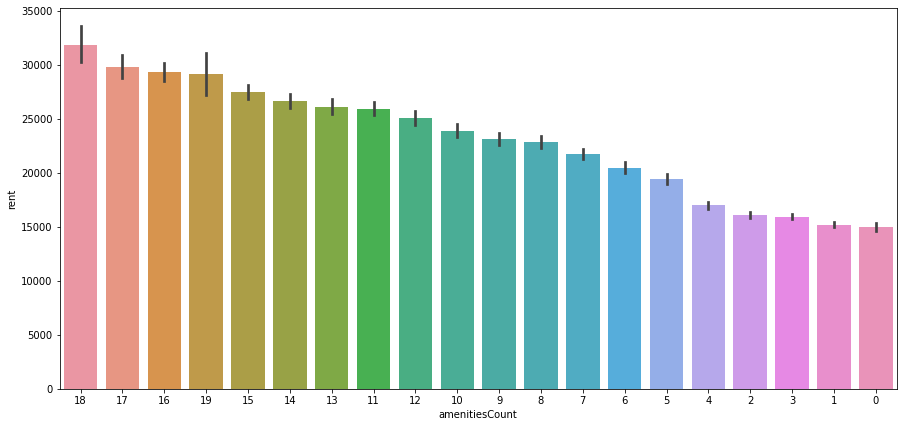

In [378]:
tempdf=pd.DataFrame()
tempdf['amenitiesCount']=fdf['Amenities_Count']
tempdf['rent']=traindf['rent']
plt.figure(figsize=(15,7))
sns.barplot(x=tempdf['amenitiesCount'],y=tempdf['rent'],
            order=tempdf.groupby(by='amenitiesCount').mean()['rent'].sort_values(ascending=False).index)
plt.show()

In [186]:
cfdf=fdf.copy()

**Get Dummies:**

In [259]:
fdf = pd.get_dummies(fdf)

**Dropping useless columns after analysis:**

In [260]:
fdf.drop(['Zone_Zone 13 Adyar','Zone_Santoshapuram','Zone_Pozhichalur','Zone_Bangalore_6','Zone_Chennai_5'],axis=1,inplace=True)

In [261]:
fdf.drop(['Zone_Chennai_8','Zone_Chennai_7','Zone_Chennai_6','Zone_Chennai_4','Zone_Chennai_3','Zone_Chennai_2','Zone_Chennai_1','Zone_Bangalore_7','Day'],axis=1,inplace=True)

In [361]:
fdf.to_csv("finaldf.csv")

**TRAIN_TEST_SPLIT:**

In [263]:
fdf['ind']=ind

**Splitting Train and Test**

In [318]:
train, test = fdf[fdf["ind"].eq("train")], fdf[fdf["ind"].eq("test")]

In [319]:
train.drop(['ind'],axis=1,inplace=True)
train['rent']=Rent
test.drop(['ind'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [339]:
x=train.drop(['rent'],axis=1)
y=train['rent'].values.reshape(-1, 1)

In [334]:
print(x.shape,y.shape)

(20500, 69) (20500, 1)


In [340]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)

In [278]:
y_train=y_train.ravel()

**MODEL TRAINING:**

In [249]:
models=[("CatBoost", CatBoostRegressor(verbose=False)),
        ("LightGBM", LGBMRegressor()),
        ("XGBoost", XGBRegressor(objective='reg:squarederror'))]

In [250]:
for ind, model in models:
     rmse = np.mean(np.sqrt(-cross_val_score(model, x_train, y_train, cv=7, scoring="neg_mean_squared_error")))
     
     print(f"RMSE: {round(rmse, 4)} ({ind}) ")

RMSE: 4547.9551 (CatBoost) 
RMSE: 4560.9882 (LightGBM) 
RMSE: 4633.5905 (XGBoost) 


**LightGBM:**

**Hyperparameters:**

In [320]:
hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['rmse'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 100000
}

In [321]:
import lightgbm as ltb
model=ltb.LGBMRegressor(**hyper_params)
model.fit(x_train, y_train.ravel(),
            eval_set=[(x_test, y_test.ravel())],
            eval_metric='rmse',
            early_stopping_rounds=1000)

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's rmse: 0.420831
Training until validation scores don't improve for 1000 rounds.
[2]	valid_0's rmse: 0.419382
[3]	valid_0's rmse: 0.417935
[4]	valid_0's rmse: 0.416499
[5]	valid_0's rmse: 0.415076
[6]	valid_0's rmse: 0.413659
[7]	valid_0's rmse: 0.412253
[8]	valid_0's rmse: 0.410913
[9]	valid_0's rmse: 0.409525
[10]	valid_0's rmse: 0.408157
[11]	valid_0's rmse: 0.406788
[12]	valid_0's rmse: 0.405427
[13]	valid_0's rmse: 0.404083
[14]	valid_0's rmse: 0.40274
[15]	valid_0's rmse: 0.401408
[16]	valid_0's rmse: 0.400088
[17]	valid_0's rmse: 0.398771
[18]	valid_0's rmse: 0.397462
[19]	valid_0's rmse: 0.396172
[20]	valid_0's rmse: 0.394884
[21]	valid_0's rmse: 0.393603
[22]	valid_0's rmse: 0.392327
[23]	valid_0's rmse: 0.391059
[24]	valid_0's rmse: 0.389805
[25]	valid_0's rmse: 0.388557
[26]	valid_0's rmse: 0.38733
[27]	valid_0's rmse: 0.386089
[28]	valid_0's rmse: 0.384864
[29]	valid_0's rmse: 0.38367
[30]	valid_0's rmse: 0.382457
[31]	valid_0's rmse: 0.381271
[32]	valid_0's rms

LGBMRegressor(bagging_fraction=0.7, bagging_freq=10, feature_fraction=0.9,
              learning_rate=0.005, max_bin=512, max_depth=8, metric=['rmse'],
              num_iterations=100000, num_leaves=128, objective='regression',
              task='train', verbose=0)

In [349]:
y_pred=np.expm1(model.predict(x_test, num_iteration=model.best_iteration_))

In [351]:
y_test

array([[17000],
       [16000],
       [12000],
       ...,
       [29000],
       [17000],
       [18000]])

In [350]:
y_pred

array([16555.13093786, 18230.00030554, 16093.86116793, ...,
       27838.81922482, 18241.46732711, 18450.3879789 ])

In [301]:
from sklearn.metrics import mean_squared_log_error
round(mean_squared_log_error(y_pred, y_train) ** 0.5, 5)

0.01696

In [357]:
outputpred=np.expm1(model.predict(test, num_iteration=model.best_iteration_))

In [358]:
outputDF=pd.DataFrame(outputpred)
outputDF.to_csv("Submission.csv",index=False)

**Saving:**

In [362]:
model.booster_.save_model('ltb_model.txt')

**Inference Code:**

In [ ]:
'''
import lightgbm as ltb
model = ltb.Booster(model_file='ltb_model.txt')
outputpred=np.expm1(model.predict(DATALIST, num_iteration=2019))'''